# Perceptron Blog
Here is a link to my source code on the GitHub repo [perceptron.py](https://github.com/bridgetulian/bridgetulian.github.io/blob/b549ac22015f1550d87e17c6f00c2402593206f1/perceptron.py). 

The perceptron update is done in my perceptron.fit() function, in which I begin by modifying the features matrix X by adding a row of ones to the features matrix to ensure that the bias is taken into account in the update (as w tilde is a vector of the weights and the bias). The function begins by assigning a random weight vector, then entering into a loop as long as the maximum steps. In this loop, a random index is chosen and then the point from that index as well as its feature vector are entered into a weight update equation which updates the weight if the predicted label and actual label are different. This for loop also keeps track of the score (accuracy) throughout the iterations. 


 # Experimentation
 
 ## Experiment: Linearly Separable
 
 The first experiment I ran had to do with linearly separable data, to ensure that the line converges. I created a perceptron object and ran my perceptron.fit function on that object, and the line did end up converging. I printed out my accuracies, and they fluctuated (albeit barely). The accuracy did end up reaching 1.0, proving line convergence. This code (and output) can be observed below. 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The accuracy of iteration 0 is 0.98.
The accuracy of iteration 1 is 0.98.
The accuracy of iteration 2 is 0.98.
The accuracy of iteration 3 is 0.98.
The accuracy of iteration 4 is 0.98.
The accuracy of iteration 5 is 0.98.
The accuracy of iteration 6 is 0.98.
The accuracy of iteration 7 is 0.98.
The accuracy of iteration 8 is 0.98.
The accuracy of iteration 9 is 0.98.
The accuracy of iteration 10 is 0.98.
The accuracy of iteration 11 is 0.98.
The accuracy of iteration 12 is 0.98.
The accuracy of iteration 13 is 0.98.
The accuracy of iteration 14 is 0.98.
The accuracy of iteration 15 is 0.98.
The accuracy of iteration 16 is 0.98.
The accuracy of iteration 17 is 0.98.
The accuracy of iteration 18 is 0.98.
The accuracy of iteration 19 is 0.98.
The accuracy of iteration 20 is 0.98.
The accuracy of iteration 21 is 0.98.
The accuracy of iteration 22 is 0.98.
The accuracy of iteration 23 is 0.98.
The accura

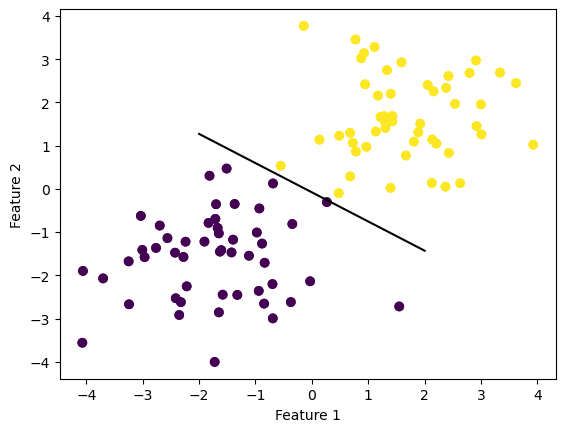

In [9]:
%load_ext autoreload
%autoreload 2
from perceptron import Perceptron
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

from sklearn.datasets import make_blobs

np.random.seed(12345)

n = 100
p_features = 3

X, y = make_blobs(n_samples = 100, n_features = p_features - 1, centers = [(-1.7, -1.7), (1.7, 1.7)])

fig = plt.scatter(X[:,0], X[:,1], c = y)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")


p = Perceptron()
p.fit(X, y, max_steps=1000)

def draw_line(w, x_min, x_max):
  x = np.linspace(x_min, x_max, 101)
  y = -(w[0]*x + w[2])/w[1]
  plt.plot(x, y, color = "black")

fig = plt.scatter(X[:,0], X[:,1], c = y)
fig = draw_line(p.w, -2, 2)

xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

## Experiment: Not Linearly Separable

The second experiment I did had to do with data that was not linearly separable, to see if the line didn't converge. Indeed, when the data was not linearly separable (as seen below), the line did not converge and the accuracy never reached 1.0. I utilized the make_circles function from sklearn.datasets to create my non linearly separable data, and the accuracy ended up (after max_steps equal to 1000) at 0.53. 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The accuracy of iteration 0 is 0.5.
The accuracy of iteration 1 is 0.5.
The accuracy of iteration 2 is 0.5.
The accuracy of iteration 3 is 0.58.
The accuracy of iteration 4 is 0.59.
The accuracy of iteration 5 is 0.59.
The accuracy of iteration 6 is 0.59.
The accuracy of iteration 7 is 0.59.
The accuracy of iteration 8 is 0.47.
The accuracy of iteration 9 is 0.47.
The accuracy of iteration 10 is 0.47.
The accuracy of iteration 11 is 0.55.
The accuracy of iteration 12 is 0.55.
The accuracy of iteration 13 is 0.5.
The accuracy of iteration 14 is 0.55.
The accuracy of iteration 15 is 0.56.
The accuracy of iteration 16 is 0.56.
The accuracy of iteration 17 is 0.56.
The accuracy of iteration 18 is 0.56.
The accuracy of iteration 19 is 0.56.
The accuracy of iteration 20 is 0.56.
The accuracy of iteration 21 is 0.56.
The accuracy of iteration 22 is 0.51.
The accuracy of iteration 23 is 0.51.
The accuracy o

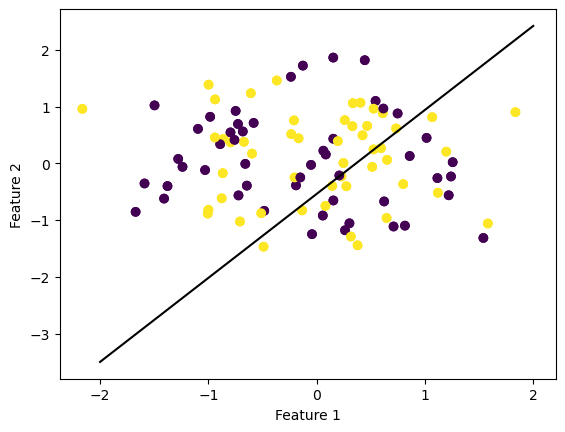

In [10]:
%load_ext autoreload
%autoreload 2
from perceptron import Perceptron
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

from sklearn.datasets import make_circles

np.random.seed(12345)

n = 100
p_features = 3

X, y = make_circles(n_samples = 100, noise = 0.5)

#X, y = make_blobs(n_samples = 100, n_features = p_features - 1, centers = [(-1.7, -1.7), (1.7, 1.7)])

fig = plt.scatter(X[:,0], X[:,1], c = y)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")


p = Perceptron()
p.fit(X, y, max_steps=1000)

def draw_line(w, x_min, x_max):
  x = np.linspace(x_min, x_max, 101)
  y = -(w[0]*x + w[2])/w[1]
  plt.plot(x, y, color = "black")

fig = plt.scatter(X[:,0], X[:,1], c = y)
fig = draw_line(p.w, -2, 2)

xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")



## Runtime Complexity of a Perceptron Update

The runtime complexity of a single iteration of the perceptron algorithm update is dependent on the number of data points n, but not on the number of features p (this is specific to my implementation of the algorithm, where I am looking at accuracy / adding the score to a property history for th perceptron). The runtime is going to be O(max_steps * n) where n is the number of data points. the for loop iterates through the specified number of max_steps, but everything within that for loop (other than the calculation of the score) is O(1). The calculation of the score is O(n), because the score predicts a label for each of the data points. Therefore, within the for loop, the runtime is O(n), making the total runtime O(max_steps * n). 